In [2]:
##### Import needed Libraries #####

import numpy as np
import pandas as pd
import math
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

print('Libraries Imported')

Libraries Imported


In [3]:
##### Read ChemBL Connections #####

df = pd.read_csv("../Zafrens_RBP.csv")


#print(df.columns)
#dfm = dfm[df.columns]
#print(dfm.columns)
#print(dfm)


# Create ChemBL Target List #
dft = df['component_synonym']
#dfp['component_synonym'] = dfp['component_synonym'].upper()
dfc = df[['chembl_id','molecule_type', 'canonical_smiles']]

#print(dft)
print(len(dft))
c =[]
for i in range(0, len(dft)):
    #c = 
    c.append(dft[i].upper())
    #print(i, dfp['component_synonym'][i])
    
#print(c)
dfp = pd.DataFrame(c, columns =['component_synonym'])
dfp['chembl_id'] = df['chembl_id']
#print(dfp)

dfpc = dfp.drop_duplicates()
dfcc = dfc.drop_duplicates()

print()
print(len(dfpc))
print(len(dfcc))

print(dfpc)

#dfpc.to_csv('../Zafrens_RBP_CompTar.csv', index=False)

135621

68984
59481
       component_synonym      chembl_id
0                  ACADM     CHEMBL1061
1                  ACADM  CHEMBL4129274
3                  ACTA1   CHEMBL411879
11                 ACTA1  CHEMBL4522174
23                 ACTA1  CHEMBL4552633
...                  ...            ...
135616           ZC3HAV1  CHEMBL1438938
135617           ZC3HAV1  CHEMBL4208737
135618           ZC3HAV1  CHEMBL4287262
135619           ZC3HAV1  CHEMBL4287655
135620           ZC3HAV1   CHEMBL449635

[68984 rows x 2 columns]


In [4]:
#print(dfpc)

c = []
cd = []

records = dfpc.to_records(index=False)
comtar = list(records)

j = 1
for i in comtar:
    #print(i)
    j = j + 1
    if i[1] in c:
        if i[1] not in cd:
            cd.append(i[1])
    else:
        c.append(i[1])
    if j % 10000 == 0:
        print(j, "Compound Rows - intake ",len(c),len(cd))
        
print()
print(len(c), len(cd))
#print(cd)


10000 Compound Rows - intake  8966 552
20000 Compound Rows - intake  14081 1510
30000 Compound Rows - intake  23632 1888
40000 Compound Rows - intake  33606 1909
50000 Compound Rows - intake  43584 1926
60000 Compound Rows - intake  53535 1963

59481 2304


In [5]:
#print(comtar)
#print(cd)

c = []

j = 1
for i in comtar:
    #print(i)
    j = j + 1
    i[0] = i[0].upper()
    if i[1] in cd:
        c.append(i)
    if j % 10000 == 0:
        print(j, "Compound Rows - intake ",len(c))

#print(c)
print()

dfcd = pd.DataFrame.from_records(c, columns =['short', 'compound'])
print(len(dfcd))
#dfcd = dfcd.drop_duplicates()
#dfcs = dfcd.sort_values(by=['compound'])
#dfp

dfcs = dfcd[['short', 'compound']]
dfcs = dfcs.drop_duplicates()
dfcs = dfcs.rename(columns={'short':'source','compound':'target'})
dfcs['weight'] = 30
dfcs['interaction'] = 'pc'
#dfcs = dfcs.sort_values(by = ['target'])
print(dfcs)

dfcs.to_csv('../Zafrens_Multi_Target.csv', index=False)

10000 Compound Rows - intake  2576
20000 Compound Rows - intake  7762
30000 Compound Rows - intake  8608
40000 Compound Rows - intake  8640
50000 Compound Rows - intake  8674
60000 Compound Rows - intake  8733

11807
        source         target  weight interaction
0        ACADM     CHEMBL1061      30          pc
1        ACADM  CHEMBL4129274      30          pc
2         ACTB  CHEMBL2063416      30          pc
3         ACTB  CHEMBL3799977      30          pc
4         ACTB  CHEMBL4066032      30          pc
...        ...            ...     ...         ...
11802  ZC3HAV1  CHEMBL1438938      30          pc
11803  ZC3HAV1  CHEMBL4208737      30          pc
11804  ZC3HAV1  CHEMBL4287262      30          pc
11805  ZC3HAV1  CHEMBL4287655      30          pc
11806  ZC3HAV1   CHEMBL449635      30          pc

[11807 rows x 4 columns]


In [7]:
dfi = pd.read_csv("../Screen_results_All_RBPs.csv")
#print(dfi)

dfic = dfi[['Protein A','Protein B','sumIS (Interaction score)']]
dfic = dfic.rename(columns={'Protein A': 'source', 'Protein B':'target', 'sumIS (Interaction score)':'weight'})
dfic['interaction'] = 'pp'
print(dfic)

      source   target  weight interaction
0      CTBP1    RBM14   17.19          pp
1      RBM14    CPSF6   16.03          pp
2      PTBP1    PTBP2   15.73          pp
3        SF1    EWSR1   15.50          pp
4     SRSF11    SRPK2   14.79          pp
...      ...      ...     ...         ...
2411   SRSF9  HNRNPA1    7.10          pp
2412  TXNL4A   ANKHD1    7.10          pp
2413   U2AF2    DDX42    7.10          pp
2414  YTHDF3    NOLC1    7.10          pp
2415   ZCRB1   HNRNPK    7.10          pp

[2416 rows x 4 columns]


In [8]:
dfeo = pd.concat([dfcs, dfic], axis=0)
print(dfeo)

dfeo.to_csv('../Zafrens_Interact_Edges.csv', index=False)


      source         target  weight interaction
0      ACADM     CHEMBL1061    30.0          pc
1      ACADM  CHEMBL4129274    30.0          pc
2       ACTB  CHEMBL2063416    30.0          pc
3       ACTB  CHEMBL3799977    30.0          pc
4       ACTB  CHEMBL4066032    30.0          pc
...      ...            ...     ...         ...
2411   SRSF9        HNRNPA1     7.1          pp
2412  TXNL4A         ANKHD1     7.1          pp
2413   U2AF2          DDX42     7.1          pp
2414  YTHDF3          NOLC1     7.1          pp
2415   ZCRB1         HNRNPK     7.1          pp

[14223 rows x 4 columns]


In [9]:
#print(cd)

records = dfcc.to_records(index=False)
comps = list(records)

c = []

j = 1
for i in comps:
    #print(i)
    j = j + 1
    if i[0] in cd:
        c.append(i)
    if j % 10000 == 0:
        print(j, "Compound Rows - intake ",len(c))
        
print(len(c))
#print(c)

dfnc = pd.DataFrame.from_records(c, columns =['chemblid', 'moltype', 'smiles'])
dfnc['moltype'] = 'Small molecule'
print(dfnc)


10000 Compound Rows - intake  1626
20000 Compound Rows - intake  2178
30000 Compound Rows - intake  2244
40000 Compound Rows - intake  2253
50000 Compound Rows - intake  2261
2304
           chemblid         moltype  \
0        CHEMBL1061  Small molecule   
1     CHEMBL4129274  Small molecule   
2     CHEMBL2063416  Small molecule   
3     CHEMBL3799977  Small molecule   
4     CHEMBL4066032  Small molecule   
...             ...             ...   
2299  CHEMBL1240974  Small molecule   
2300  CHEMBL1242284  Small molecule   
2301  CHEMBL2311578  Small molecule   
2302  CHEMBL4572843  Small molecule   
2303   CHEMBL119235  Small molecule   

                                                 smiles  
0                           O=C1NC(=O)C(Cc2ccc(O)cc2)S1  
1     C=CC(=O)Nc1ccccc1Nc1nc(Nc2ccc(N3CCN(CCOCCOCCOC...  
2     O=C(CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12)NCCOCCO...  
3     C#CCNC(=O)c1ccc(N2N=C(C)/C(=C/c3ccc(-c4cc(C)c(...  
4     CCNc1ccc(-c2[nH]c3cc(C(=O)NCCOCCOC(=O)CCCC[C@@...  
...

In [11]:
records = dfic.to_records(index=False)
prot = list(records)

c = []

j = 1
for i in prot:
    #print(i)
    j = j + 1
    if i[0] not in c:
        c.append(i[0])
    if i[1] not in c:
        c.append(i[1])
    if j % 1000 == 0:
        print(j, "Interaction Rows - intake ",len(c))

print(len(c))

records = dfcs.to_records(index=False)
prot2 = list(records)

for i in prot:
    #print(i)
    j = j + 1
    if i[0] not in c:
        c.append(i[0])
    #if i[1] not in c:
    #    c.append(i[1])
    if j % 1000 == 0:
        print(j, "Interaction Rows - intake ",len(c))
        
print(len(c))
#print(c)

dfnp = pd.DataFrame(c, columns =['chemblid'])
dfnp['moltype'] = 'Protein'
dfnp['label'] = dfnp['chemblid']
print(dfnp)

1000 Interaction Rows - intake  421
2000 Interaction Rows - intake  665
731
3000 Interaction Rows - intake  731
4000 Interaction Rows - intake  731
731
     chemblid  moltype     label
0       CTBP1  Protein     CTBP1
1       RBM14  Protein     RBM14
2       CPSF6  Protein     CPSF6
3       PTBP1  Protein     PTBP1
4       PTBP2  Protein     PTBP2
..        ...      ...       ...
726      NOL7  Protein      NOL7
727  RPS19BP1  Protein  RPS19BP1
728      PUS7  Protein      PUS7
729     NOLC1  Protein     NOLC1
730     ZCRB1  Protein     ZCRB1

[731 rows x 3 columns]


In [12]:
dfno = pd.concat([dfnc, dfnp], axis=0)
print(dfno)

dfno.to_csv('../Zafrens_Interact_Nodes.csv', index=False)

          chemblid         moltype  \
0       CHEMBL1061  Small molecule   
1    CHEMBL4129274  Small molecule   
2    CHEMBL2063416  Small molecule   
3    CHEMBL3799977  Small molecule   
4    CHEMBL4066032  Small molecule   
..             ...             ...   
726           NOL7         Protein   
727       RPS19BP1         Protein   
728           PUS7         Protein   
729          NOLC1         Protein   
730          ZCRB1         Protein   

                                                smiles     label  
0                          O=C1NC(=O)C(Cc2ccc(O)cc2)S1       NaN  
1    C=CC(=O)Nc1ccccc1Nc1nc(Nc2ccc(N3CCN(CCOCCOCCOC...       NaN  
2    O=C(CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12)NCCOCCO...       NaN  
3    C#CCNC(=O)c1ccc(N2N=C(C)/C(=C/c3ccc(-c4cc(C)c(...       NaN  
4    CCNc1ccc(-c2[nH]c3cc(C(=O)NCCOCCOC(=O)CCCC[C@@...       NaN  
..                                                 ...       ...  
726                                                NaN      NOL7  
727    

In [13]:
#print(dfcs)
#print(dfic)

dfi = dfic[['source','target']]
#intpair = list(records)
#print(intpair)

l = len(dfcs)
#l = 10

q3 = []

### find 3-edge cycles ###
print('### 3-edge cycles ###')
print()

for i in range(0,l-1):
    a = dfcs['target'][i]
    b = dfcs['source'][i]
    if i%100 == 0:
        print(i, ' of ',l)
    #print(a,b)
    for j in range(i+1,l):
        ct = dfcs['target'][j]
        if ct == a:
            d = dfcs['source'][j]
            #print(i,j, a, b, d)
            qfi = dfi.loc[dfi.isin([b]).any(axis=1)].index.tolist()
            #print(qfi)
            qf = dfi.iloc[qfi]
            #print(qf)
            qri = qf.loc[qf.isin([d]).any(axis=1)].index.tolist()
            if len(qri) != 0:
                #print(qf)
                print(qfi, qri)
                print(i,j, a, b, d)
                q = (a,b,d)
                print(q)
                q3.append(q)
            #qr = dfi.iloc[qri]
            #print(qr)
    #atest.append(a)
    
#print(q3)
print('Number 3-node cycle : ',len(q3))

dfcy = pd.DataFrame.from_records(q3, columns =['chemblid', 'source', 'target'])
dfcy.to_csv('../Zafrens_CyclePrep.csv', index=False)
dfc1 = dfcy[['chemblid', 'source']]
dfc1 = dfc1.rename(columns={'source':'target'})
dfc2 = dfcy[['chemblid', 'target']]
df3c = pd.concat([dfc1, dfc2], axis=0)
df3c = df3c.drop_duplicates()
df3c = df3c.rename(columns={'chemblid':'source'})

df3p = dfcy[['source', 'target']]
df3p = df3p.drop_duplicates()

df3c['Interaction'] = 'ct'
df3c['weight'] = 10
print(df3c)

df3p['Interaction'] = 'pp'
df3p['weight'] = 1
print(df3p)

df3 = pd.concat([df3c, df3p], axis=0)

df3.to_csv('../Zafrens_Cycles_3.csv', index=False)



### 3-edge cycles ###

0  of  11807
[1041] [1041]
13 7402 CHEMBL4129274 ATP5F1C FAM120A
('CHEMBL4129274', 'ATP5F1C', 'FAM120A')
100  of  11807
200  of  11807
300  of  11807
400  of  11807
500  of  11807
600  of  11807
700  of  11807
800  of  11807
900  of  11807
1000  of  11807
1100  of  11807
1200  of  11807
1300  of  11807
1400  of  11807
1500  of  11807
1600  of  11807
1700  of  11807
1800  of  11807
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1823 2722 CHEMBL14762 CLK1 CLK2
('CHEMBL14762', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
1823 10539 CHEMBL14762 CLK1 RAN
('CHEMBL14762', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
1823 10854 CHEMBL14762 CLK1 SRPK2
('CHEMBL14762', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1906 2765 CHEMBL4075509 CLK1 CLK2
('CHEMBL4075509', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1907 2766 CHEMBL4075820 CLK1 CLK2
('CHEMBL4075820', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1908 2767 CHEMBL4076448 CLK1 CLK2
('CHEMBL4076448', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1909 2768 CHEMBL4076663 CLK1 CLK2
('CHEMBL4076663', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1910 2769 CHEMBL4076906 CLK1 CLK2
('CHEMBL4076906', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1959 2809 CHEMBL10 CLK1 CLK2
('CHEMBL10', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
1959 10797 CHEMBL10 CLK1 SRPK2
('CHEMBL10', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1960 2810 CHEMBL100473 CLK1 CLK2
('CHEMBL100473', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1961 2811 CHEMBL101253 CLK1 CLK2
('CHEMBL101253', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
1961 10507 CHEMBL101253 CLK1 RAN
('CHEMBL101253', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1986 2848 CHEMBL1163510 CLK1 CLK2
('CHEMBL1163510', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1987 2849 CHEMBL1163518 CLK1 CLK2
('CHEMBL1163518', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1988 2850 CHEMBL1163559 CLK1 CLK2
('CHEMBL1163559', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
1989 2851 CHEMBL1163565 CLK1 CLK2
('CHEMBL1163565', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
1989 10814 CHEMBL1163565 CLK1 SRPK2
('CHEMBL1163565', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 18

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2012 10525 CHEMBL1233300 CLK1 RAN
('CHEMBL1233300', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2013 2879 CHEMBL1233528 CLK1 CLK2
('CHEMBL1233528', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2013 10526 CHEMBL1233528 CLK1 RAN
('CHEMBL1233528', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2014 2880 CHEMBL1233881 CLK1 CLK2
('CHEMBL1233881', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2014 10832 CHEMBL1233881 CLK1 SRPK2
('CHEMBL1233881', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 18

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2040 2904 CHEMBL1318637 CLK1 CLK2
('CHEMBL1318637', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2041 2905 CHEMBL132904 CLK1 CLK2
('CHEMBL132904', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2042 2906 CHEMBL1329627 CLK1 CLK2
('CHEMBL1329627', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2043 2907 CHEMBL1331525 CLK1 CLK2
('CHEMBL1331525', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2044 2909 CHEMBL1336 CLK1 CLK2
('CHEMBL1336', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 20

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2088 2956 CHEMBL1614710 CLK1 CLK2
('CHEMBL1614710', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2088 10542 CHEMBL1614710 CLK1 RAN
('CHEMBL1614710', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2089 2957 CHEMBL1614713 CLK1 CLK2
('CHEMBL1614713', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2089 10543 CHEMBL1614713 CLK1 RAN
('CHEMBL1614713', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2090 10544 CHEMBL1614725 CLK1 RAN
('CHEMBL1614725', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2117 10554 CHEMBL1801204 CLK1 RAN
('CHEMBL1801204', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2118 3022 CHEMBL1822054 CLK1 CLK2
('CHEMBL1822054', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2118 10872 CHEMBL1822054 CLK1 SRPK2
('CHEMBL1822054', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2119 3024 CHEMBL1834184 CLK1 CLK2
('CHEMBL1834184', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2119 10873 CHEMBL1834184 CLK1 SRPK2
('CHEMBL1834184', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2146 3153 CHEMBL191384 CLK1 CLK2
('CHEMBL191384', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2146 10882 CHEMBL191384 CLK1 SRPK2
('CHEMBL191384', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2147 3155 CHEMBL1922094 CLK1 CLK2
('CHEMBL1922094', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2147 10563 CHEMBL1922094 CLK1 RAN
('CHEMBL1922094', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2148 3158 CHEMBL1933142 CLK1 CLK2
('CHEMBL1933142', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2176 3202 CHEMBL2087361 CLK1 CLK2
('CHEMBL2087361', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2176 10580 CHEMBL2087361 CLK1 RAN
('CHEMBL2087361', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2177 10581 CHEMBL2103830 CLK1 RAN
('CHEMBL2103830', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2178 3203 CHEMBL2103839 CLK1 CLK2
('CHEMBL2103839', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2178 10582 CHEMBL2103839 CLK1 RAN
('CHEMBL2103839', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2200 3229 CHEMBL217092 CLK1 CLK2
('CHEMBL217092', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2200 10599 CHEMBL217092 CLK1 RAN
('CHEMBL217092', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2201 3230 CHEMBL2180604 CLK1 CLK2
('CHEMBL2180604', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2201 10600 CHEMBL2180604 CLK1 RAN
('CHEMBL2180604', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2202 3239 CHEMBL2204495 CLK1 CLK2
('CHEMBL2204495', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2228 3302 CHEMBL2392367 CLK1 CLK2
('CHEMBL2392367', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2229 3303 CHEMBL2392368 CLK1 CLK2
('CHEMBL2392368', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2230 3304 CHEMBL2396661 CLK1 CLK2
('CHEMBL2396661', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2230 10613 CHEMBL2396661 CLK1 RAN
('CHEMBL2396661', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2231 3305 CHEMBL2402081 CLK1 CLK2
('CHEMBL2402081', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2257 10620 CHEMBL259084 CLK1 RAN
('CHEMBL259084', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2257 10950 CHEMBL259084 CLK1 SRPK2
('CHEMBL259084', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2258 3349 CHEMBL259388 CLK1 CLK2
('CHEMBL259388', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2259 3350 CHEMBL259389 CLK1 CLK2
('CHEMBL259389', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2259 10951 CHEMBL259389 CLK1 SRPK2
('CHEMBL259389', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 20

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2287 10623 CHEMBL281948 CLK1 RAN
('CHEMBL281948', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2287 10969 CHEMBL281948 CLK1 SRPK2
('CHEMBL281948', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2288 3416 CHEMBL282342 CLK1 CLK2
('CHEMBL282342', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2289 3419 CHEMBL286721 CLK1 CLK2
('CHEMBL286721', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2289 10972 CHEMBL286721 CLK1 SRPK2
('CHEMBL286721', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 20

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2311 10639 CHEMBL3186534 CLK1 RAN
('CHEMBL3186534', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2312 3450 CHEMBL3187723 CLK1 CLK2
('CHEMBL3187723', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2312 10640 CHEMBL3187723 CLK1 RAN
('CHEMBL3187723', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2313 10641 CHEMBL3188267 CLK1 RAN
('CHEMBL3188267', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2314 3451 CHEMBL3188551 CLK1 CLK2
('CHEMBL3188551', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2340 3483 CHEMBL3358999 CLK1 CLK2
('CHEMBL3358999', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2342 10655 CHEMBL3402762 CLK1 RAN
('CHEMBL3402762', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2343 10656 CHEMBL3408248 CLK1 RAN
('CHEMBL3408248', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2344 3484 CHEMBL3417525 CLK1 CLK2
('CHEMBL3417525', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2344 10994 CHEMBL3417525 CLK1 SRPK2
('CHEMBL3417525', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 18

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2373 3509 CHEMBL359482 CLK1 CLK2
('CHEMBL359482', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2373 11001 CHEMBL359482 CLK1 SRPK2
('CHEMBL359482', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2374 3512 CHEMBL3609637 CLK1 CLK2
('CHEMBL3609637', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2374 11002 CHEMBL3609637 CLK1 SRPK2
('CHEMBL3609637', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2375 3514 CHEMBL361708 CLK1 CLK2
('CHEMBL361708', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2406 3557 CHEMBL379300 CLK1 CLK2
('CHEMBL379300', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2406 11023 CHEMBL379300 CLK1 SRPK2
('CHEMBL379300', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2407 3559 CHEMBL3797887 CLK1 CLK2
('CHEMBL3797887', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2407 11025 CHEMBL3797887 CLK1 SRPK2
('CHEMBL3797887', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2409 3560 CHEMBL3798256 CLK1 CLK2
('CHEMBL3798256', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 18

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2437 3595 CHEMBL3885335 CLK1 CLK2
('CHEMBL3885335', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2438 3596 CHEMBL3885360 CLK1 CLK2
('CHEMBL3885360', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2439 3597 CHEMBL3885431 CLK1 CLK2
('CHEMBL3885431', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2440 3598 CHEMBL388978 CLK1 CLK2
('CHEMBL388978', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2440 11037 CHEMBL388978 CLK1 SRPK2
('CHEMBL388978', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2465 3632 CHEMBL4066450 CLK1 CLK2
('CHEMBL4066450', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2466 3634 CHEMBL4066861 CLK1 CLK2
('CHEMBL4066861', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2467 3635 CHEMBL4067013 CLK1 CLK2
('CHEMBL4067013', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2468 3636 CHEMBL406821 CLK1 CLK2
('CHEMBL406821', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2469 3637 CHEMBL406845 CLK1 CLK2
('CHEMBL406845', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2501 11062 CHEMBL410456 CLK1 SRPK2
('CHEMBL410456', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2502 3679 CHEMBL4104657 CLK1 CLK2
('CHEMBL4104657', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2503 3680 CHEMBL411645 CLK1 CLK2
('CHEMBL411645', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2504 3681 CHEMBL411901 CLK1 CLK2
('CHEMBL411901', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2505 10699 CHEMBL411907 CLK1 RAN
('CHEMBL411907', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2534 3720 CHEMBL440084 CLK1 CLK2
('CHEMBL440084', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2534 11079 CHEMBL440084 CLK1 SRPK2
('CHEMBL440084', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2535 3721 CHEMBL440411 CLK1 CLK2
('CHEMBL440411', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2536 3722 CHEMBL440687 CLK1 CLK2
('CHEMBL440687', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2536 11080 CHEMBL440687 CLK1 SRPK2
('CHEMBL440687', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 20

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2561 11102 CHEMBL4516471 CLK1 SRPK2
('CHEMBL4516471', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2562 3754 CHEMBL4516611 CLK1 CLK2
('CHEMBL4516611', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2562 11103 CHEMBL4516611 CLK1 SRPK2
('CHEMBL4516611', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2563 3755 CHEMBL4516843 CLK1 CLK2
('CHEMBL4516843', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2563 11104 CHEMBL4516843 CLK1 SRPK2
('CHEMBL4516843', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2585 11123 CHEMBL4534005 CLK1 SRPK2
('CHEMBL4534005', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2586 3777 CHEMBL4535474 CLK1 CLK2
('CHEMBL4535474', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2586 11124 CHEMBL4535474 CLK1 SRPK2
('CHEMBL4535474', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2587 3778 CHEMBL4536197 CLK1 CLK2
('CHEMBL4536197', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2587 11125 CHEMBL4536197 CLK1 SRPK2
('CHEMBL4536197', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2608 3802 CHEMBL4563315 CLK1 CLK2
('CHEMBL4563315', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2608 11145 CHEMBL4563315 CLK1 SRPK2
('CHEMBL4563315', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2609 3803 CHEMBL4564126 CLK1 CLK2
('CHEMBL4564126', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2610 3804 CHEMBL4564312 CLK1 CLK2
('CHEMBL4564312', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2610 11146 CHEMBL4564312 CLK1 SRPK2
('CHEMBL4564312', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2633 3848 CHEMBL477772 CLK1 CLK2
('CHEMBL477772', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2633 10708 CHEMBL477772 CLK1 RAN
('CHEMBL477772', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2633 11168 CHEMBL477772 CLK1 SRPK2
('CHEMBL477772', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2634 3852 CHEMBL478649 CLK1 CLK2
('CHEMBL478649', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2636 3862 CHEMBL482767 CLK1 CLK2
('CHEMBL482767', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2661 3920 CHEMBL521179 CLK1 CLK2
('CHEMBL521179', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2661 11181 CHEMBL521179 CLK1 SRPK2
('CHEMBL521179', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2662 3922 CHEMBL521851 CLK1 CLK2
('CHEMBL521851', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2662 10723 CHEMBL521851 CLK1 RAN
('CHEMBL521851', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2662 11182 CHEMBL521851 CLK1 SRPK2
('CHEMBL521851', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 20

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2684 11196 CHEMBL572878 CLK1 SRPK2
('CHEMBL572878', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2685 3952 CHEMBL572881 CLK1 CLK2
('CHEMBL572881', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [1545]
2685 10736 CHEMBL572881 CLK1 RAN
('CHEMBL572881', 'CLK1', 'RAN')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2685 11197 CHEMBL572881 CLK1 SRPK2
('CHEMBL572881', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2686 3953 CHEMBL573339 CLK1 CLK2
('CHEMBL573339', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 20

[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2710 3990 CHEMBL7724 CLK1 CLK2
('CHEMBL7724', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2710 11222 CHEMBL7724 CLK1 SRPK2
('CHEMBL7724', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2711 3994 CHEMBL80713 CLK1 CLK2
('CHEMBL80713', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [2018]
2711 11226 CHEMBL80713 CLK1 SRPK2
('CHEMBL80713', 'CLK1', 'SRPK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048, 2263, 2318, 2387] [427]
2712 3995 CHEMBL83980 CLK1 CLK2
('CHEMBL83980', 'CLK1', 'CLK2')
[378, 427, 468, 850, 1125, 1186, 1190, 1373, 1545, 1591, 1771, 1825, 1850, 2018, 2019, 2048

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2749 4077 CHEMBL4064546 CLK2 CLK3
('CHEMBL4064546', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2750 4078 CHEMBL4064988 CLK2 CLK3
('CHEMBL4064988', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2751 4079 CHEMBL4065432 CLK2 CLK3
('CHEMBL4065432', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2752 4080 CHEMBL4067420 CLK2 CLK3
('CHEMBL4067420', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2753 4081 CHEMBL4067477 CLK2 CLK3
('CHEMBL4067477', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2754 4082 CHEMBL4069158 CLK2 CLK3
('CHEMBL4069158', 'C

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2801 4129 CHEMBL4098237 CLK2 CLK3
('CHEMBL4098237', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2802 4130 CHEMBL4099677 CLK2 CLK3
('CHEMBL4099677', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2803 4131 CHEMBL4100956 CLK2 CLK3
('CHEMBL4100956', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2804 4132 CHEMBL4102871 CLK2 CLK3
('CHEMBL4102871', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2805 4133 CHEMBL4104296 CLK2 CLK3
('CHEMBL4104296', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2806 4134 CHEMBL4105084 CLK2 CLK3
('CHEMBL4105084', 'C

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2857 4187 CHEMBL116438 CLK2 CLK3
('CHEMBL116438', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2858 4188 CHEMBL1165499 CLK2 CLK3
('CHEMBL1165499', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2859 4189 CHEMBL1170139 CLK2 CLK3
('CHEMBL1170139', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2860 4190 CHEMBL1171523 CLK2 CLK3
('CHEMBL1171523', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2862 4191 CHEMBL1173655 CLK2 CLK3
('CHEMBL1173655', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2863 4192 CHEMBL1182777 CLK2 CLK3
('CHEMBL1182777', 'CLK

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2919 4241 CHEMBL13972 CLK2 CLK3
('CHEMBL13972', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2920 4242 CHEMBL1397614 CLK2 CLK3
('CHEMBL1397614', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2921 4243 CHEMBL1398474 CLK2 CLK3
('CHEMBL1398474', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2922 4244 CHEMBL14014 CLK2 CLK3
('CHEMBL14014', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2923 4245 CHEMBL1407164 CLK2 CLK3
('CHEMBL1407164', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2924 4246 CHEMBL14112 CLK2 CLK3
('CHEMBL14112', 'CLK2', 'CLK3'

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2972 4290 CHEMBL1725513 CLK2 CLK3
('CHEMBL1725513', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2973 4291 CHEMBL17331 CLK2 CLK3
('CHEMBL17331', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2974 4292 CHEMBL1734733 CLK2 CLK3
('CHEMBL1734733', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2975 4293 CHEMBL1738757 CLK2 CLK3
('CHEMBL1738757', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2976 4294 CHEMBL1738797 CLK2 CLK3
('CHEMBL1738797', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
2977 4295 CHEMBL174426 CLK2 CLK3
('CHEMBL174426', 'CLK2', 

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3022 4340 CHEMBL1822054 CLK2 CLK3
('CHEMBL1822054', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3023 4341 CHEMBL182283 CLK2 CLK3
('CHEMBL182283', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3024 4342 CHEMBL1834184 CLK2 CLK3
('CHEMBL1834184', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3025 4343 CHEMBL1834199 CLK2 CLK3
('CHEMBL1834199', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3026 4344 CHEMBL183993 CLK2 CLK3
('CHEMBL183993', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3027 4345 CHEMBL185238 CLK2 CLK3
('CHEMBL185238', 'CLK2', 

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3082 4392 CHEMBL1909345 CLK2 CLK3
('CHEMBL1909345', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3083 4393 CHEMBL1909347 CLK2 CLK3
('CHEMBL1909347', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3084 4394 CHEMBL1909349 CLK2 CLK3
('CHEMBL1909349', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3085 4395 CHEMBL1909350 CLK2 CLK3
('CHEMBL1909350', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3086 4396 CHEMBL1909351 CLK2 CLK3
('CHEMBL1909351', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3087 4397 CHEMBL1909352 CLK2 CLK3
('CHEMBL1909352', 'C

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3131 4441 CHEMBL1909396 CLK2 CLK3
('CHEMBL1909396', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3132 4442 CHEMBL1909397 CLK2 CLK3
('CHEMBL1909397', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3133 4443 CHEMBL1909398 CLK2 CLK3
('CHEMBL1909398', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3134 4444 CHEMBL1909399 CLK2 CLK3
('CHEMBL1909399', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3135 4445 CHEMBL1909400 CLK2 CLK3
('CHEMBL1909400', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3136 4446 CHEMBL1909401 CLK2 CLK3
('CHEMBL1909401', 'C

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3195 4494 CHEMBL206544 CLK2 CLK3
('CHEMBL206544', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3196 4495 CHEMBL206834 CLK2 CLK3
('CHEMBL206834', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3198 4496 CHEMBL207247 CLK2 CLK3
('CHEMBL207247', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3199 4497 CHEMBL207410 CLK2 CLK3
('CHEMBL207410', 'CLK2', 'CLK3')
3200  of  11807
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3201 4498 CHEMBL208437 CLK2 CLK3
('CHEMBL208437', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3202 4499 CHEMBL2087361 CLK2 CLK3
('CHEMBL208736

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3255 4545 CHEMBL2218938 CLK2 CLK3
('CHEMBL2218938', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3256 4546 CHEMBL2218939 CLK2 CLK3
('CHEMBL2218939', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3257 4547 CHEMBL2218940 CLK2 CLK3
('CHEMBL2218940', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3258 4548 CHEMBL2218941 CLK2 CLK3
('CHEMBL2218941', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3259 4549 CHEMBL221959 CLK2 CLK3
('CHEMBL221959', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3261 4550 CHEMBL222102 CLK2 CLK3
('CHEMBL222102', 'CLK2'

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3337 4598 CHEMBL255465 CLK2 CLK3
('CHEMBL255465', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3338 4599 CHEMBL255863 CLK2 CLK3
('CHEMBL255863', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3339 4600 CHEMBL257113 CLK2 CLK3
('CHEMBL257113', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3340 4601 CHEMBL257167 CLK2 CLK3
('CHEMBL257167', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3341 4602 CHEMBL258721 CLK2 CLK3
('CHEMBL258721', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3342 4603 CHEMBL258726 CLK2 CLK3
('CHEMBL258726', 'CLK2', 'CLK3'

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3387 4648 CHEMBL270544 CLK2 CLK3
('CHEMBL270544', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3388 4649 CHEMBL270724 CLK2 CLK3
('CHEMBL270724', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3389 4650 CHEMBL270995 CLK2 CLK3
('CHEMBL270995', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3390 4651 CHEMBL271594 CLK2 CLK3
('CHEMBL271594', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3391 4652 CHEMBL271595 CLK2 CLK3
('CHEMBL271595', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3392 4653 CHEMBL271843 CLK2 CLK3
('CHEMBL271843', 'CLK2', 'CLK3'

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3441 4699 CHEMBL3128043 CLK2 CLK3
('CHEMBL3128043', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3442 4700 CHEMBL313417 CLK2 CLK3
('CHEMBL313417', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3443 4701 CHEMBL3137331 CLK2 CLK3
('CHEMBL3137331', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3445 4702 CHEMBL3182444 CLK2 CLK3
('CHEMBL3182444', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3446 4703 CHEMBL3182621 CLK2 CLK3
('CHEMBL3182621', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3447 4704 CHEMBL3184679 CLK2 CLK3
('CHEMBL3184679', 'CLK

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3511 4752 CHEMBL359999 CLK2 CLK3
('CHEMBL359999', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3512 4753 CHEMBL3609637 CLK2 CLK3
('CHEMBL3609637', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3513 4754 CHEMBL361237 CLK2 CLK3
('CHEMBL361237', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3514 4755 CHEMBL361708 CLK2 CLK3
('CHEMBL361708', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3515 4756 CHEMBL3617968 CLK2 CLK3
('CHEMBL3617968', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3516 4757 CHEMBL361894 CLK2 CLK3
('CHEMBL361894', 'CLK2', 'C

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3568 4804 CHEMBL381604 CLK2 CLK3
('CHEMBL381604', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3569 4805 CHEMBL381948 CLK2 CLK3
('CHEMBL381948', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3570 4806 CHEMBL382590 CLK2 CLK3
('CHEMBL382590', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3571 4807 CHEMBL38380 CLK2 CLK3
('CHEMBL38380', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3572 4808 CHEMBL383899 CLK2 CLK3
('CHEMBL383899', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3573 4809 CHEMBL384073 CLK2 CLK3
('CHEMBL384073', 'CLK2', 'CLK3')


[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3628 4853 CHEMBL406375 CLK2 CLK3
('CHEMBL406375', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3629 4854 CHEMBL406381 CLK2 CLK3
('CHEMBL406381', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3630 4855 CHEMBL4064123 CLK2 CLK3
('CHEMBL4064123', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3631 4856 CHEMBL4064608 CLK2 CLK3
('CHEMBL4064608', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3634 4857 CHEMBL4066861 CLK2 CLK3
('CHEMBL4066861', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3635 4858 CHEMBL4067013 CLK2 CLK3
('CHEMBL4067013', 'CLK2'

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3686 4905 CHEMBL413188 CLK2 CLK3
('CHEMBL413188', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3687 4906 CHEMBL414883 CLK2 CLK3
('CHEMBL414883', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3688 4907 CHEMBL415049 CLK2 CLK3
('CHEMBL415049', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3689 4908 CHEMBL416056 CLK2 CLK3
('CHEMBL416056', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3690 4909 CHEMBL4165749 CLK2 CLK3
('CHEMBL4165749', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3692 4910 CHEMBL4174988 CLK2 CLK3
('CHEMBL4174988', 'CLK2', 'C

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3742 4961 CHEMBL446024 CLK2 CLK3
('CHEMBL446024', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3745 4962 CHEMBL4472294 CLK2 CLK3
('CHEMBL4472294', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3746 4963 CHEMBL4473365 CLK2 CLK3
('CHEMBL4473365', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3748 4964 CHEMBL450071 CLK2 CLK3
('CHEMBL450071', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3749 4965 CHEMBL450519 CLK2 CLK3
('CHEMBL450519', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3750 4966 CHEMBL450786 CLK2 CLK3
('CHEMBL450786', 'CLK2', 'C

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3799 5011 CHEMBL4560589 CLK2 CLK3
('CHEMBL4560589', 'CLK2', 'CLK3')
3800  of  11807
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3800 5012 CHEMBL4561806 CLK2 CLK3
('CHEMBL4561806', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3801 5013 CHEMBL456252 CLK2 CLK3
('CHEMBL456252', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3802 5014 CHEMBL4563315 CLK2 CLK3
('CHEMBL4563315', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3804 5015 CHEMBL4564312 CLK2 CLK3
('CHEMBL4564312', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3805 5016 CHEMBL4564973 CLK2 CLK3
('CHEM

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3856 5063 CHEMBL47940 CLK2 CLK3
('CHEMBL47940', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3857 5064 CHEMBL479533 CLK2 CLK3
('CHEMBL479533', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3858 5065 CHEMBL480371 CLK2 CLK3
('CHEMBL480371', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3859 5066 CHEMBL480382 CLK2 CLK3
('CHEMBL480382', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3860 5067 CHEMBL481510 CLK2 CLK3
('CHEMBL481510', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3861 5068 CHEMBL482326 CLK2 CLK3
('CHEMBL482326', 'CLK2', 'CLK3')


[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3908 5115 CHEMBL516248 CLK2 CLK3
('CHEMBL516248', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3909 5116 CHEMBL516312 CLK2 CLK3
('CHEMBL516312', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3910 5117 CHEMBL516908 CLK2 CLK3
('CHEMBL516908', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3911 5118 CHEMBL517123 CLK2 CLK3
('CHEMBL517123', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3912 5119 CHEMBL517171 CLK2 CLK3
('CHEMBL517171', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3913 5120 CHEMBL517507 CLK2 CLK3
('CHEMBL517507', 'CLK2', 'CLK3'

[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3962 5166 CHEMBL588025 CLK2 CLK3
('CHEMBL588025', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3963 5167 CHEMBL592445 CLK2 CLK3
('CHEMBL592445', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3964 5168 CHEMBL596380 CLK2 CLK3
('CHEMBL596380', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3965 5169 CHEMBL596674 CLK2 CLK3
('CHEMBL596674', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3966 5170 CHEMBL598797 CLK2 CLK3
('CHEMBL598797', 'CLK2', 'CLK3')
[46, 92, 93, 105, 321, 427, 461, 474, 789, 800, 1058, 1277, 1325, 1454, 1723, 1946, 2255, 2368] [92]
3967 5171 CHEMBL599894 CLK2 CLK3
('CHEMBL599894', 'CLK2', 'CLK3'

[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4110 11051 CHEMBL4085557 CLK3 SRPK2
('CHEMBL4085557', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4116 11054 CHEMBL408982 CLK3 SRPK2
('CHEMBL408982', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4142 10797 CHEMBL10 CLK3 SRPK2
('CHEMBL10', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4144 10798 CHEMBL101253 CLK3 SRPK2
('CHEMBL101253', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4145 10799 CHEMBL101683 CLK3 SRPK2
('CHEMBL101683', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4148 10800 CHEMBL102346 CLK3 SRPK2
('CHEMBL102346', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4155 10801 CHEMBL103667 CLK3 SRPK2
('CHEMBL103667', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4156 10802 CHEMBL104264 CLK3 SRPK2
('CHEMBL104264', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163

[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4305 10865 CHEMBL1789941 CLK3 SRPK2
('CHEMBL1789941', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4333 10866 CHEMBL179583 CLK3 SRPK2
('CHEMBL179583', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4334 10867 CHEMBL180022 CLK3 SRPK2
('CHEMBL180022', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4335 10868 CHEMBL1800685 CLK3 SRPK2
('CHEMBL1800685', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4336 10869 CHEMBL1802485 CLK3 SRPK2
('CHEMBL1802485', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4337 10870 CHEMBL1802727 CLK3 SRPK2
('CHEMBL1802727', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4338 10871 CHEMBL1802728 CLK3 SRPK2
('CHEMBL1802728', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4340 10872 CHEMBL1822054 CLK3 SRPK2
('CHEMBL1822054', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237

[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4599 10945 CHEMBL255863 CLK3 SRPK2
('CHEMBL255863', 'CLK3', 'SRPK2')
4600  of  11807
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4601 10946 CHEMBL257167 CLK3 SRPK2
('CHEMBL257167', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4602 10947 CHEMBL258721 CLK3 SRPK2
('CHEMBL258721', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4605 10948 CHEMBL258805 CLK3 SRPK2
('CHEMBL258805', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4606 10949 CHEMBL258844 CLK3 SRPK2
('CHEMBL258844', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4609 10950 CHEMBL259084 CLK3 SRPK2
('CHEMBL259084', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4611 10951 CHEMBL259389 CLK3 SRPK2
('CHEMBL259389', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4613 10952 CHEMBL259551 CLK3 SRPK2
('CHEMBL259551', 'CLK3', 'SRPK2')
[92, 754, 1068, 

[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4783 11014 CHEMBL3746293 CLK3 SRPK2
('CHEMBL3746293', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4786 11015 CHEMBL3758502 CLK3 SRPK2
('CHEMBL3758502', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4787 11017 CHEMBL377193 CLK3 SRPK2
('CHEMBL377193', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4788 11018 CHEMBL377300 CLK3 SRPK2
('CHEMBL377300', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4790 11019 CHEMBL3774885 CLK3 SRPK2
('CHEMBL3774885', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4791 11020 CHEMBL3775317 CLK3 SRPK2
('CHEMBL3775317', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4793 11021 CHEMBL3775576 CLK3 SRPK2
('CHEMBL3775576', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4795 11022 CHEMBL379218 CLK3 SRPK2
('CHEMBL379218', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 

[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4951 11087 CHEMBL4446405 CLK3 SRPK2
('CHEMBL4446405', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4952 11088 CHEMBL4448899 CLK3 SRPK2
('CHEMBL4448899', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4953 11089 CHEMBL4455357 CLK3 SRPK2
('CHEMBL4455357', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4954 11090 CHEMBL4455512 CLK3 SRPK2
('CHEMBL4455512', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4955 11091 CHEMBL4455582 CLK3 SRPK2
('CHEMBL4455582', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4957 11092 CHEMBL4455923 CLK3 SRPK2
('CHEMBL4455923', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4958 11093 CHEMBL4456123 CLK3 SRPK2
('CHEMBL4456123', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
4959 11094 CHEMBL445813 CLK3 SRPK2
('CHEMBL445813', 'CLK3', 'SRPK2')
[92, 754, 1068, 12

[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5025 11156 CHEMBL4580220 CLK3 SRPK2
('CHEMBL4580220', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5029 11157 CHEMBL4585243 CLK3 SRPK2
('CHEMBL4585243', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5030 11158 CHEMBL4585920 CLK3 SRPK2
('CHEMBL4585920', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5031 11159 CHEMBL4586794 CLK3 SRPK2
('CHEMBL4586794', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5033 11160 CHEMBL4588900 CLK3 SRPK2
('CHEMBL4588900', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5034 11161 CHEMBL4591082 CLK3 SRPK2
('CHEMBL4591082', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5035 11162 CHEMBL4591350 CLK3 SRPK2
('CHEMBL4591350', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5036 11163 CHEMBL4593677 CLK3 SRPK2
('CHEMBL4593677', 'CLK3', 'SRPK2')
[92, 754, 1068, 

[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5201 11228 CHEMBL86943 CLK3 SRPK2
('CHEMBL86943', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5202 11229 CHEMBL91730 CLK3 SRPK2
('CHEMBL91730', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5203 11230 CHEMBL91829 CLK3 SRPK2
('CHEMBL91829', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5204 11231 CHEMBL92461 CLK3 SRPK2
('CHEMBL92461', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5205 11232 CHEMBL939 CLK3 SRPK2
('CHEMBL939', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5206 11233 CHEMBL941 CLK3 SRPK2
('CHEMBL941', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5211 11234 CHEMBL97771 CLK3 SRPK2
('CHEMBL97771', 'CLK3', 'SRPK2')
[92, 754, 1068, 1237, 1361, 1976, 2163, 2264] [754]
5212 11235 CHEMBL98350 CLK3 SRPK2
('CHEMBL98350', 'CLK3', 'SRPK2')
5300  of  11807
5400  of  11807
5500  of  11807
5600  of

In [21]:
print()
print('### 4-edge cycles ###')
print()

q4 = []
#print(dfcs)

# find 4-edge cycles
for i in range(0,l-2):
    a = dfcs['target'][i]
    b = dfcs['source'][i]
    if i%100 == 0:
        print(i, ' of ',l)
        print(b, a)
    for j in range(i+1,l-1):
        ct = dfcs['target'][j]
        if ct == a:
            d = dfcs['source'][j]
            #print(i,j, a, b, d)
            qfi = dfi.loc[dfi.isin([b]).any(axis=1)].index.tolist()
            #print(qf)
            qf = dfi.iloc[qfi]
            #print(qf)
            qri = dfi.loc[dfi.isin([d]).any(axis=1)].index.tolist()
            #print(qf)
            qr = dfi.iloc[qri]
            #print(qr)
            qa = []
            for k in range(0, len(qf)):
                a1 = qf.iloc[k].tolist()
                #a2 = qf.iloc['target'][k]
                if a1[0] == b:
                    qa.append(a1[1])
                else:
                    qa.append(a1[0])
            #print(qa)
            for k in range(0, len(qr)):
                a1 = qr.iloc[k].tolist()
                #print(a1)
                if a1[0] == d:
                    qb = a1[1]
                else:
                    qb = a1[0]
                #print(a1, qb)
                if qb in qa:
                    q = (a, b, qb, d)
                    q4.append(q)
                    print(i, j, 'Cycle : ',q)
                    #print()
    #print()
    #atest.append(a)
print()    
print(q4)

dfcy4 = pd.DataFrame.from_records(q4, columns =['chemblid', 'source', 'target', 'return'])
#dfcy4.to_csv('../Zafrens_CyclePrep4.csv', index=False)




### 4-edge cycles ###



NameError: name 'l' is not defined

In [3]:
dfcy4 = pd.read_csv('../Zafrens_CyclePrep4.csv')

#print(dfcy4)

dfc1 = dfcy4[['chemblid', 'source']]
dfc2 = dfcy4[['chemblid', 'return']]
dfc1 = dfc1.rename(columns={'chemblid':'source','source':'target'})
dfc2 = dfc2.rename(columns={'chemblid':'source','return':'target'})
df4c = pd.concat([dfc1, dfc2], axis=0)
df4c = df4c.drop_duplicates()

#print(dfc1, dfc2)
#print(df4c)

dfc1 = dfcy4[['source', 'target']]
dfc2 = dfcy4[['return', 'target']]
dfc2 = dfc2.rename(columns={'return':'source'})
df4p = pd.concat([dfc1, dfc2], axis=0)
df4p = df4p.drop_duplicates()
#print(dfc1, dfc2)
#print(df4p)

for i in range(0, len(df4p)):
    a = []
    a.append(df4p['source'].iloc[i])
    a.append(df4p['target'].iloc[i])
    if a[0] > a[1]:
        c = a[1]
        a[1] = a[0]
        a[0] = c
        #print(a, a[0], a[1])
        df4p['source'].iloc[i] = a[0]
        df4p['target'].iloc[i] = a[1]
        
df4p = df4p.drop_duplicates()
#print(df4p)

#df4p.to_csv('../Zafrens_TargetPrep4.csv', index=False)

df4c['Interaction'] = 'ct'
df4c['weight'] = 1
print(df4c)

df4p['Interaction'] = 'pp'
df4p['weight'] = 10
print(df4p)

df4 = pd.concat([df4c, df4p], axis=0)
df4.to_csv('../Zafrens_Cycles_4.csv', index=False)

              source   target Interaction  weight
0      CHEMBL2063416     ACTB          ct       1
2      CHEMBL3799977     ACTB          ct       1
4      CHEMBL4294164     ACTB          ct       1
7          CHEMBL121  ATP5F1B          ct       1
8          CHEMBL595  ATP5F1B          ct       1
...              ...      ...         ...     ...
20839  CHEMBL4294164      RAN          ct       1
20844  CHEMBL4129274     RPSA          ct       1
20944  CHEMBL1404283    VPS4B          ct       1
20945  CHEMBL3361178    VPS4B          ct       1
21066   CHEMBL119235    YWHAZ          ct       1

[6812 rows x 4 columns]
        source     target Interaction  weight
0         ACTB  EIF4ENIF1          pp      10
7      ATP5F1B  EIF4ENIF1          pp      10
10        BRD4      RBM14          pp      10
15        CASK      PRPF6          pp      10
218      CISD1      SNRPA          pp      10
...        ...        ...         ...     ...
21062    CPSF7      SRSF9          pp      10
21066  

In [10]:
#print(compounds)

mol = []
rcl = []

for i in compounds:
    #print(i[0],i[1])
    #print(i[1])
    #if i[1] != 'Protein':
    rcl.append((i[0], i[2]))
    mt = Chem.MolFromSmiles(i[2])
    mol.append(mt)
    #else:
    #    print('Fail',i)

print(rcl)
#Draw.MolsToGridImage(mol, molsPerRow=4, maxMols = 200)

### calculate distance as Eucledian distance as network preparation ###
nmol = len(mol)
print(nmol)
#fps = [Chem.RDKFingerprint(i) for i in mol]
fps = [AllChem.GetMorganFingerprintAsBitVect(i,3,nBits=2048,useFeatures=True) for i in mol]
tmd = []
for i in range(0, nmol-1):
    for j in range(i+1, nmol):
        td = DataStructs.FingerprintSimilarity(fps[i],fps[j])        
        if td >= 0.7:
            #print(r[i][0],r[j][0],td)
            tani = 10*td
            dd = 10*DataStructs.FingerprintSimilarity(fps[i],fps[j], metric=DataStructs.DiceSimilarity)
            k = (rcl[i][0],"cc",rcl[j][0],td,tani,dd)
            #print(k)
            tmd.append(k)
        #else:
            #print(rcl[i][0],rcl[j][0],'No Connect')
            
print(len(tmd))
print(tmd)


            

[('CHEMBL1240928', 'Cc1occ2c1C(=O)c1c(O)ccc(O)c1C2'), ('CHEMBL1240971', 'Cc1cc(O)cc2cc3c(c(O)c12)C(=O)CCC3O'), ('CHEMBL1242196', 'Cc1cc(O)c2c(O)cccc2c1-c1cc(=O)cc(O)o1'), ('CHEMBL1242197', 'Cc1cc(O)cc2oc(Cc3cc(O)cc(=O)o3)cc(=O)c12'), ('CHEMBL1309685', 'COc1cc(OC)c2c(-c3ccccc3)cc(=O)oc2c1C(CC(=O)N1CCCC1)c1ccc2c(c1)OCO2'), ('CHEMBL1330249', 'CCN(CC)C(=O)CC(c1cc(OC)c(OC)c(OC)c1)c1c(OC)cc(OC)c2c(-c3ccccc3)cc(=O)oc12'), ('CHEMBL1390568', 'COc1ccc(C(CC(=O)N2CCOCC2)c2c(OC)cc(OC)c3c(-c4ccccc4)cc(=O)oc23)cc1'), ('CHEMBL1398194', 'COc1cc(C(CC(=O)N2CCCC2)c2c(OC)cc(OC)c3c(-c4ccccc4)cc(=O)oc23)cc(OC)c1OC'), ('CHEMBL1483840', 'CC#CC#Cc1cccc(=O)o1'), ('CHEMBL1499653', 'COc1ccc(C(CC(=O)N2CCCC2)c2c(OC)cc(OC)c3c(-c4ccccc4)cc(=O)oc23)cc1'), ('CHEMBL1506938', 'Cc1ccc(Nc2ccc(N)cc2S(=O)(=O)O)cc1'), ('CHEMBL1522581', 'CCN(CC)C(=O)CC(c1ccc(OC)cc1)c1c(OC)cc(OC)c2c(-c3ccccc3)cc(=O)oc12'), ('CHEMBL227075', 'Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1'), ('CHEMBL4061748', 'N#Cc1c(N)nc(SCC(=O)c2ccc(O)c(O)c2)c(C#

869
[('CHEMBL1309685', 'cc', 'CHEMBL1330249', 0.7283950617283951, 7.283950617283951, 8.428571428571429), ('CHEMBL1309685', 'cc', 'CHEMBL1398194', 0.8205128205128205, 8.205128205128204, 9.014084507042254), ('CHEMBL1309685', 'cc', 'CHEMBL1499653', 0.7974683544303798, 7.974683544303797, 8.873239436619718), ('CHEMBL1309685', 'cc', 'CHEMBL1522581', 0.7073170731707317, 7.073170731707316, 8.285714285714286), ('CHEMBL1309685', 'cc', 'CHEMBL1422657', 0.7875, 7.875, 8.811188811188812), ('CHEMBL1309685', 'cc', 'CHEMBL1603147', 0.7093023255813954, 7.093023255813954, 8.299319727891156), ('CHEMBL1330249', 'cc', 'CHEMBL1390568', 0.7, 7.0, 8.235294117647058), ('CHEMBL1330249', 'cc', 'CHEMBL1398194', 0.8857142857142857, 8.857142857142858, 9.393939393939394), ('CHEMBL1330249', 'cc', 'CHEMBL1499653', 0.7368421052631579, 7.368421052631579, 8.484848484848484), ('CHEMBL1330249', 'cc', 'CHEMBL1522581', 0.8309859154929577, 8.309859154929578, 9.076923076923077), ('CHEMBL1330249', 'cc', 'CHEMBL1422657', 0.72727

In [11]:
##### Compound Assay Target Network #####

dfcc = pd.DataFrame.from_records(tmd, columns =['source', 'interaction', 'target', 'weight', 'tani','dice'])
print(dfcc)

dfca = pd.DataFrame.from_records(compass, columns =['source', 'target'])
dfca['interaction'] = 'ca'
w = 2
dfca['weight'] = w
dfca['tani'] = w
dfca['dice'] = w
dfca = dfca[['source', 'interaction', 'target', 'weight','tani','dice']]
print(dfca)

dfta = pd.DataFrame.from_records(targass, columns =['source', 'target'])
dfta['interaction'] = 'ta'
w = 5
dfta['weight'] = w
dfta['tani'] = w
dfta['dice'] = w
dfta = dfta[['source', 'interaction', 'target', 'weight', 'tani', 'dice']]
print(dfta)

dfeo = pd.concat([dfcc, dfca, dfta], axis=0)
print(dfeo)

dfeo.to_csv('../Chembl_RBP_Edges.csv', index=False)

                  source interaction               target    weight      tani  \
0          CHEMBL1309685          cc        CHEMBL1330249  0.728395  7.283951   
1          CHEMBL1309685          cc        CHEMBL1398194  0.820513  8.205128   
2          CHEMBL1309685          cc        CHEMBL1499653  0.797468  7.974684   
3          CHEMBL1309685          cc        CHEMBL1522581  0.707317  7.073171   
4          CHEMBL1309685          cc        CHEMBL1422657  0.787500  7.875000   
..                   ...         ...                  ...       ...       ...   
864         jm1c00018_18          cc         jm1c00018_19  0.844828  8.448276   
865         jm1c00018_18          cc         jm1c00018_20  0.824561  8.245614   
866         jm1c00018_19          cc         jm1c00018_20  0.754098  7.540984   
867        CHEMBL4290141          cc       nchembio1837_1  0.736111  7.361111   
868  cellrep201804116_16          cc  cellrep201804116_30  0.802817  8.028169   

         dice  
0    8.4285

In [12]:
#print(df)
ct = df[['chembl_id', 'CHEMBL_Target']]

# unify Compound-Target List
records = ct.to_records(index=False)
result = list(records)
#print(result)

comtar = []
for i in result:
    #print(i)
    if i not in comtar:
        comtar.append(i)

print(comtar)
print(len(comtar))


[('CHEMBL1240928', 'CHEMBL1250379'), ('CHEMBL1240971', 'CHEMBL1250379'), ('CHEMBL1242196', 'CHEMBL1250379'), ('CHEMBL1242197', 'CHEMBL1250379'), ('CHEMBL1309685', 'CHEMBL1250379'), ('CHEMBL1330249', 'CHEMBL1250379'), ('CHEMBL1390568', 'CHEMBL1250379'), ('CHEMBL1398194', 'CHEMBL1250379'), ('CHEMBL1483840', 'CHEMBL1250379'), ('CHEMBL1499653', 'CHEMBL1250379'), ('CHEMBL1506938', 'CHEMBL1250379'), ('CHEMBL1522581', 'CHEMBL1250379'), ('CHEMBL227075', 'CHEMBL1250379'), ('CHEMBL4061748', 'CHEMBL1250379'), ('CHEMBL4064932', 'CHEMBL1250379'), ('CHEMBL4066821', 'CHEMBL1250379'), ('CHEMBL4067653', 'CHEMBL1250379'), ('CHEMBL4070465', 'CHEMBL1250379'), ('CHEMBL4073526', 'CHEMBL1250379'), ('CHEMBL4073683', 'CHEMBL1250379'), ('CHEMBL4075458', 'CHEMBL1250379'), ('CHEMBL4075620', 'CHEMBL1250379'), ('CHEMBL4075916', 'CHEMBL1250379'), ('CHEMBL4076484', 'CHEMBL1250379'), ('CHEMBL4077265', 'CHEMBL1250379'), ('CHEMBL4077803', 'CHEMBL1250379'), ('CHEMBL4078539', 'CHEMBL1250379'), ('CHEMBL4081086', 'CHEMBL125

In [13]:
##### Compound Target Network Only #####

dfct = pd.DataFrame.from_records(comtar, columns =['source', 'target'])
dfct['interaction'] = 'ct'
w = 3
dfct['weight'] = w
dfct['tani'] = w
dfct['dice'] = w
dfct = dfct[['source', 'interaction', 'target', 'weight', 'tani', 'dice']]
print(dfct)

dfeo = pd.concat([dfcc, dfct], axis=0)
print(dfeo)

dfeo.to_csv('../Chembl_RBP_Edge2.csv', index=False)

                  source interaction         target  weight  tani  dice
0          CHEMBL1240928          ct  CHEMBL1250379       3     3     3
1          CHEMBL1240971          ct  CHEMBL1250379       3     3     3
2          CHEMBL1242196          ct  CHEMBL1250379       3     3     3
3          CHEMBL1242197          ct  CHEMBL1250379       3     3     3
4          CHEMBL1309685          ct  CHEMBL1250379       3     3     3
..                   ...         ...            ...     ...   ...   ...
659  cellrep201804116_38          ct  CHEMBL4523458       3     3     3
660  cellrep201804116_39          ct  CHEMBL4523458       3     3     3
661  cellrep201804116_40          ct  CHEMBL4523458       3     3     3
662  cellrep201804116_41          ct  CHEMBL4523458       3     3     3
663  cellrep201804116_42          ct  CHEMBL4523458       3     3     3

[664 rows x 6 columns]
                  source interaction         target    weight      tani  \
0          CHEMBL1309685          cc 

Run  1  :  131  clusters of  326  -  9122.62262478879 / 6510
Run  2  :  132  clusters of  326  -  9153.323514862324 / 6510
Run  3  :  133  clusters of  326  -  9012.071422531719 / 6510
Run  4  :  134  clusters of  326  -  8987.627170715474 / 6510
Run  5  :  135  clusters of  326  -  8981.829972068872 / 6510
Run  6  :  136  clusters of  326  -  8932.532093564647 / 6510
Run  7  :  137  clusters of  326  -  8880.48295119913 / 6510
Run  8  :  138  clusters of  326  -  8884.821144720434 / 6510
Run  9  :  139  clusters of  326  -  8815.114790139341 / 6510
Run  10  :  140  clusters of  326  -  8732.3015829924 / 6510
Run  11  :  141  clusters of  326  -  8631.454829892327 / 6510
Run  12  :  142  clusters of  326  -  8796.053377178383 / 6510
Run  13  :  143  clusters of  326  -  8531.310556110553 / 6510
Run  14  :  144  clusters of  326  -  8641.382490523083 / 6510
Run  15  :  145  clusters of  326  -  8437.711823888669 / 6510
Run  16  :  146  clusters of  326  -  8457.627605053187 / 6510
Run  

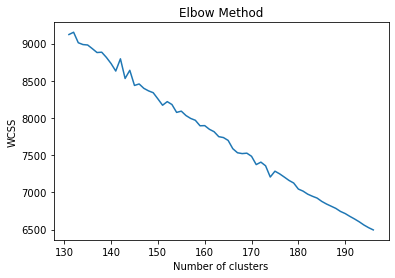

Clustering start
196 26 6483.069534632032 5

[127  31 193 108  34  34  34  34   6  34 127  34  48 185  70 106  21  81
  81  81  81  81  56  81  81  64  70  56  81  70  81  81  21  80  81  21
  21 166  86  43  52  52  52  55  55 108  15  20  15  15 169 169  15  15
  15  15  15  15  93 163 163 139  20 163 163  79  79   3   3   3   3   3
   3   3  79  79 194 194 194  79  79  79  79  79   8   8   8   8   8   8
   8   8   8   8  79  79  79 174  79  79 174  24 183 144 140 127 149 127
  22  12 178 178 178   4  12  22  22 118   4  12 178  14  49  14 178  14
  12 118  12 120 178  49 118   4  14  68  12 118  12  49 118  12 118  22
  12   4  48 120  68  12  14  51  62   7 105 129   7 129   7 129 105 129
 105  76 129   7 129 129 129   7 129   7 129   7  76 129 105  48  67  67
 115 115 101  36  36  92 119  83  62 188 170  98 136 136  19  62 123   1
 172  19 167 129 155 135 124  19  28 167  88  27 161  48  62 148  48  40
 129  88 141  40  97  92 145 137  17 110  65 164 179  48  62  62 104 126
  65  

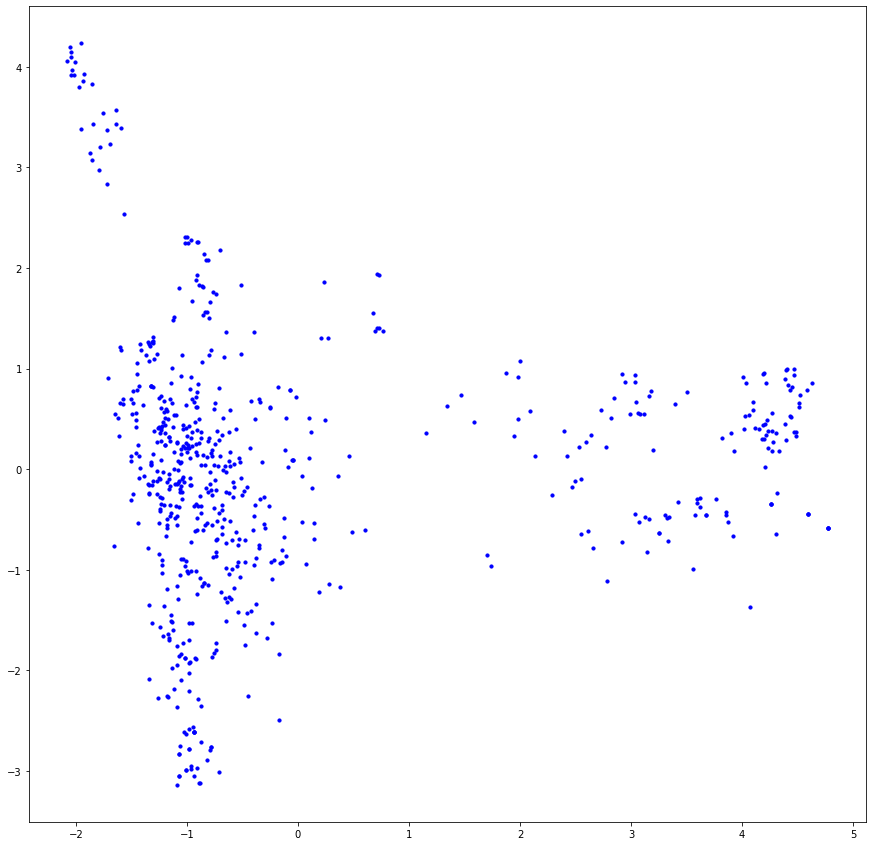

In [14]:
##### Calculate Cluster Cutoff #####

wcss = []
#print(fps)
a = int(nmol/2)+1
b = int(nmol/5)+1
i = b
ki = 100*nmol
cmol = 10*nmol

#for i in range(b, a):
while ki > cmol and i < a:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=5, random_state=0)
    kmeans.fit(fps)
    print('Run ',i-b+1,' : ',i,' clusters of ',a,' - ',kmeans.inertia_,'/',cmol)
    wcss.append(kmeans.inertia_)
    i = i+1
    #if kmeans.inertia_ > 10*nmol:
    cut_off = i
    ki = kmeans.inertia_

#cut_off = cut_off +1        
        
plt.plot(range(b, i), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#print(cut_off, wcss)

#print(fps)
#import math

#cut_off = 201
cut_off = cut_off-1
minit=int(math.sqrt(nmol)+1)
miter=int(nmol/2)
print('Clustering start')
kmeans = KMeans(n_clusters=cut_off, init='k-means++', max_iter=miter, n_init=minit, random_state=0)
kmeans.fit(fps)

print(cut_off, minit, kmeans.inertia_, kmeans.n_iter_)
print()
print(kmeans.labels_)

##### Calculate Initial PCA #####

from sklearn.decomposition import PCA

#kmc = kmeans.cluster_centers_

pca = PCA(n_components=3)

pca.fit(fps)

#kpca = pca.transform(kmc)
spca = pca.transform(fps)

print(pca.n_components_, pca.n_features_)
print(pca.explained_variance_)
print(pca.components_)

#kpcadf = pd.DataFrame(data = kpca
#             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#print(kpca)
figdim = 15
plt.figure(figsize=(figdim,figdim))
#plt.scatter(kpca[:,0], kpca[:,1], c= 'r', s = 100)
plt.scatter(spca[:,0], spca[:,1], c= 'b', s = 10)